# Compare topography files
## Load modules

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
# sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
sys.path.insert(1, '../utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Mar  5 2020, 17:11:00) 
[GCC 7.3.0]


- GMTED2010 (6km): https://www.temis.nl/data/gmted2010/
- NOAA NGDC GLOBE (1km): http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NGDC/.GLOBE/.topo/datafiles.html

In [34]:
latlim = slice(27, 45)
lonlim = slice(61, 105)

path_topo = '/home/lalandmi/Dropbox/data/elevation/' # local
ds = xr.open_dataset(path_topo+'GMTED2010/GMTED2010_15n240_1000deg.nc').drop_dims('nbounds').swap_dims(
    {'nlat': 'latitude', 'nlon': 'longitude'}).drop({'nlat', 'nlon'}).rename(
    {'latitude': 'lat', 'longitude': 'lon'}).sel(lat=latlim, lon=lonlim)
gmted = ds.elevation.load()

globe = xr.open_dataset(path_topo+'GLOBE/NOAA_NGDC_GLOBE_topo_1km.nc').topo.rename(
    {'Y': 'lat', 'X': 'lon'}).sel(lat=slice(latlim.stop, latlim.start), lon=lonlim).load()

path = '/home/lalandmi/Dropbox/data/SRTM/'
srtm = xr.open_dataset(path+'SRTM15_V2.3.nc').sel(lat=latlim, lon=lonlim).z

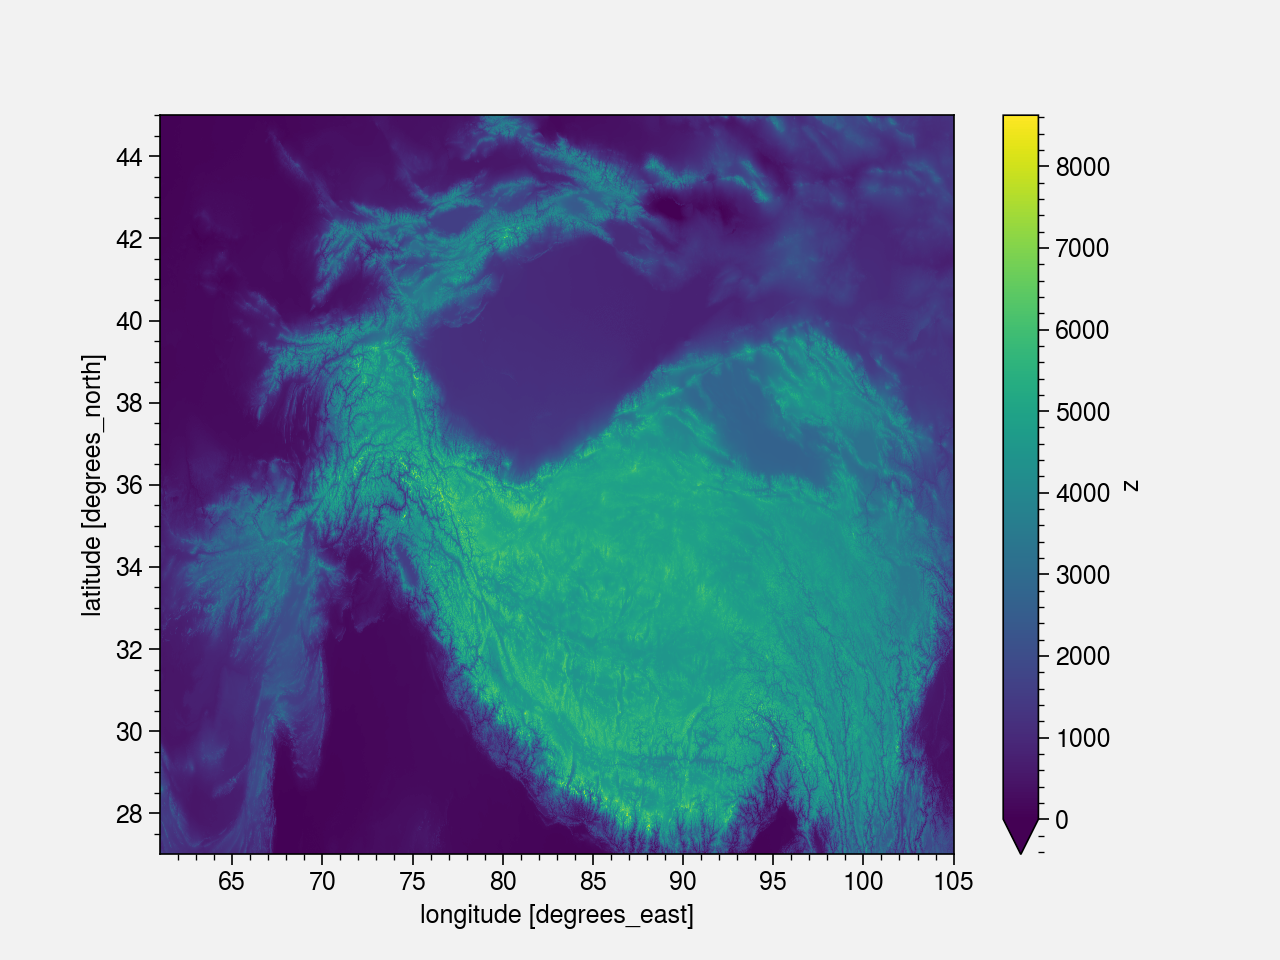

In [37]:
srtm.plot(vmin=0)

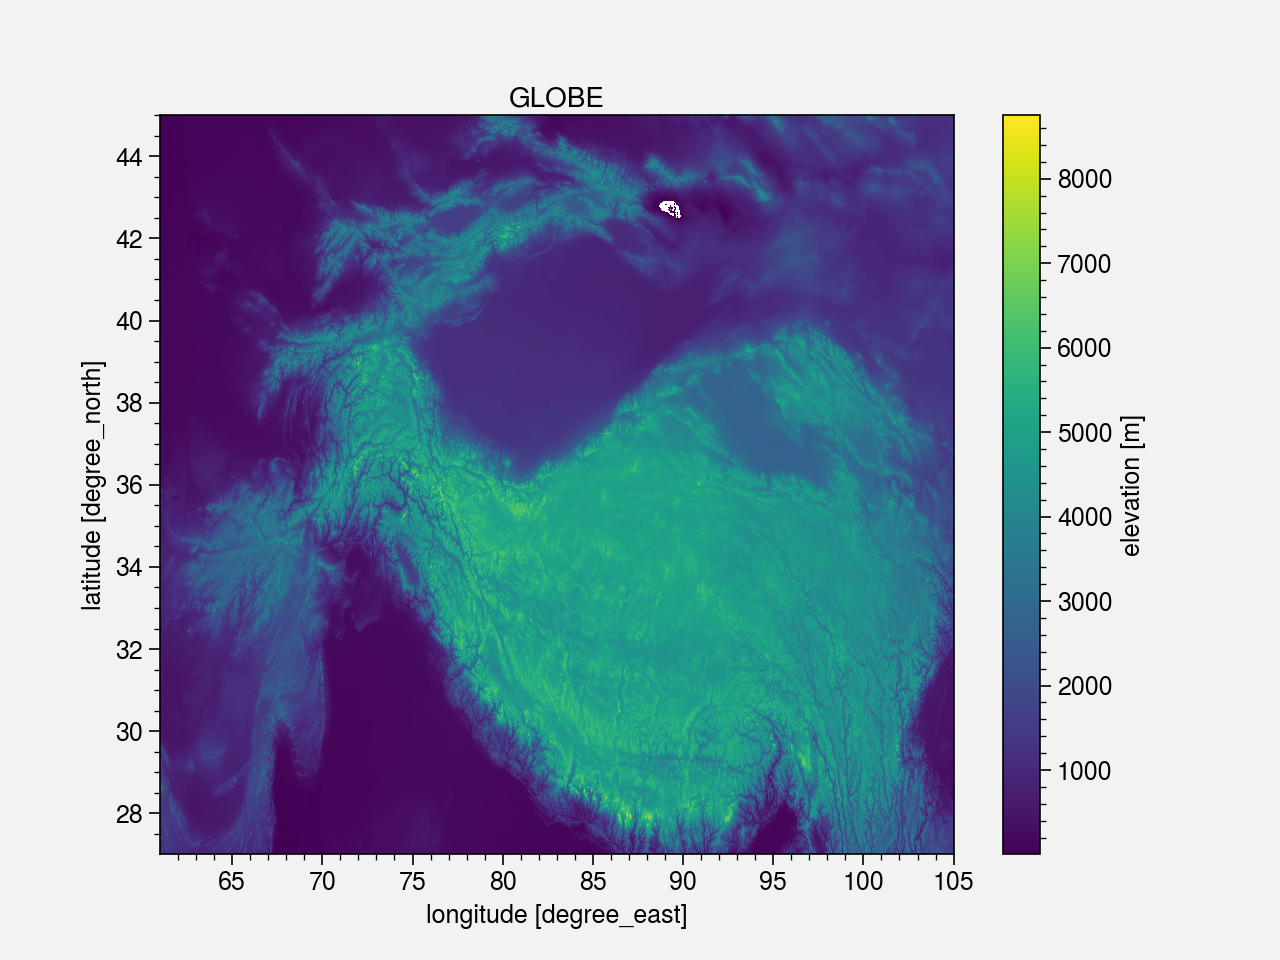

In [14]:
globe.plot()
plt.title('GLOBE')
plt.savefig('GLOBE_DEM_HMA.jpg')

In [3]:
hmasr = xr.open_mfdataset(path_topo+'HMASR_DEM_DATA/*.nc', combine='by_coords').elevation \
        .rename({'Longitude': 'lon', 'Latitude': 'lat'}).transpose("lat", "lon").load()

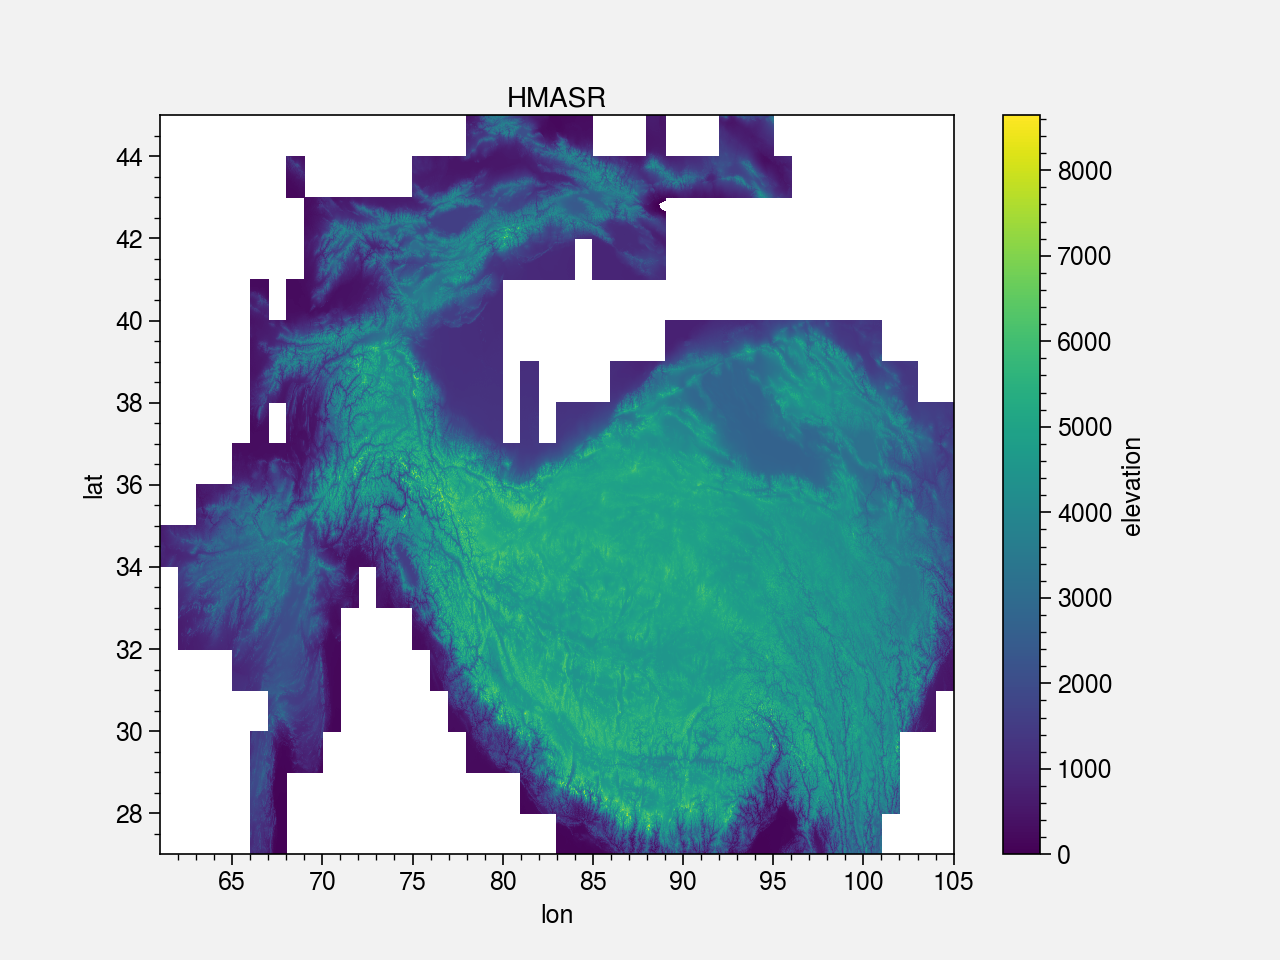

In [15]:
hmasr.plot()
plt.title('HMASR')
plt.savefig('HMASR_DEM_HMA.jpg')

## Everest zoom

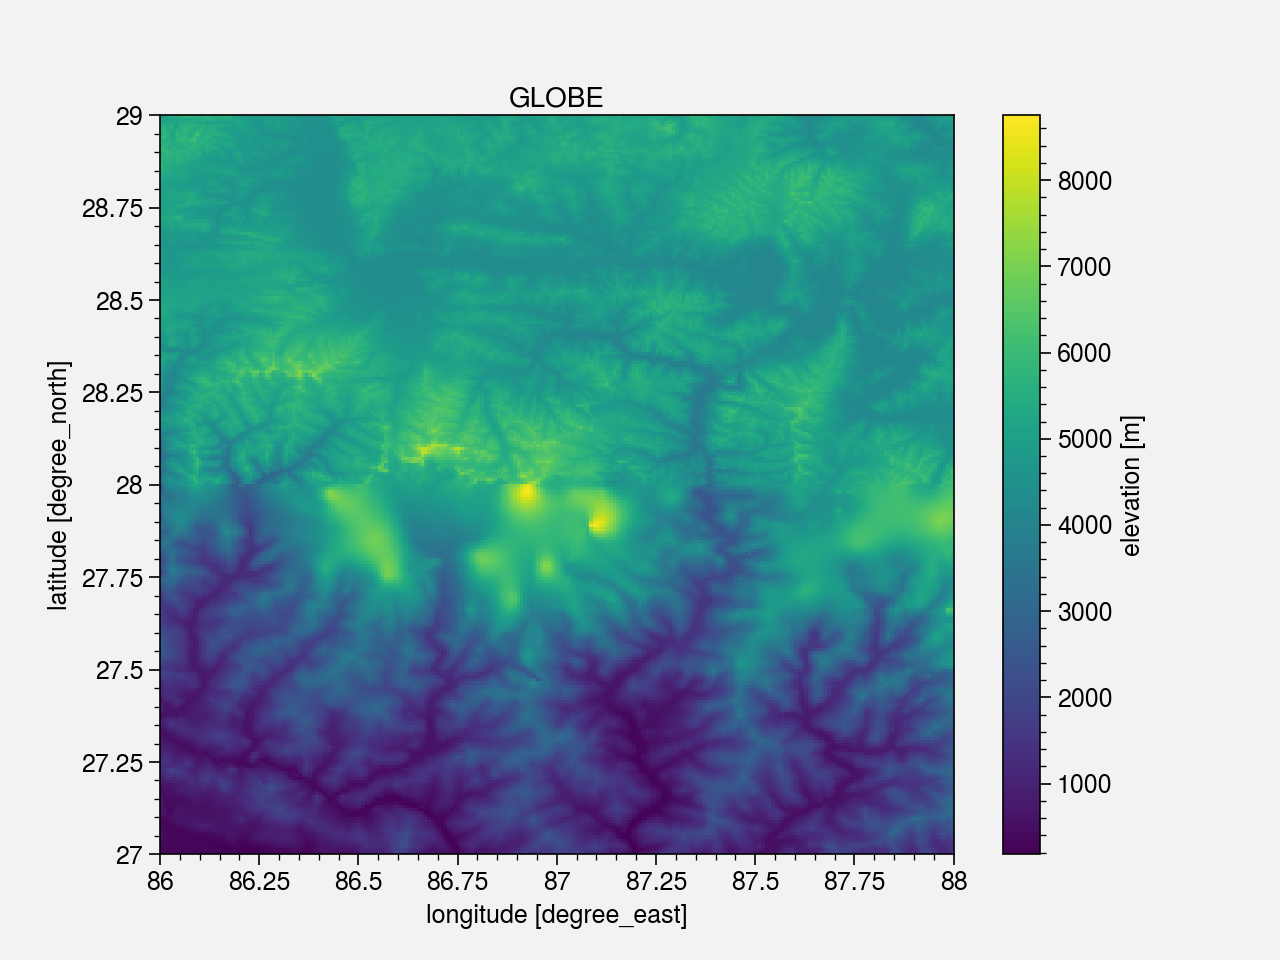

In [16]:
globe.sel(lat=slice(29, 27), lon=slice(86, 88)).plot()
plt.title('GLOBE')
plt.savefig('GLOBE_DEM_everest.jpg')

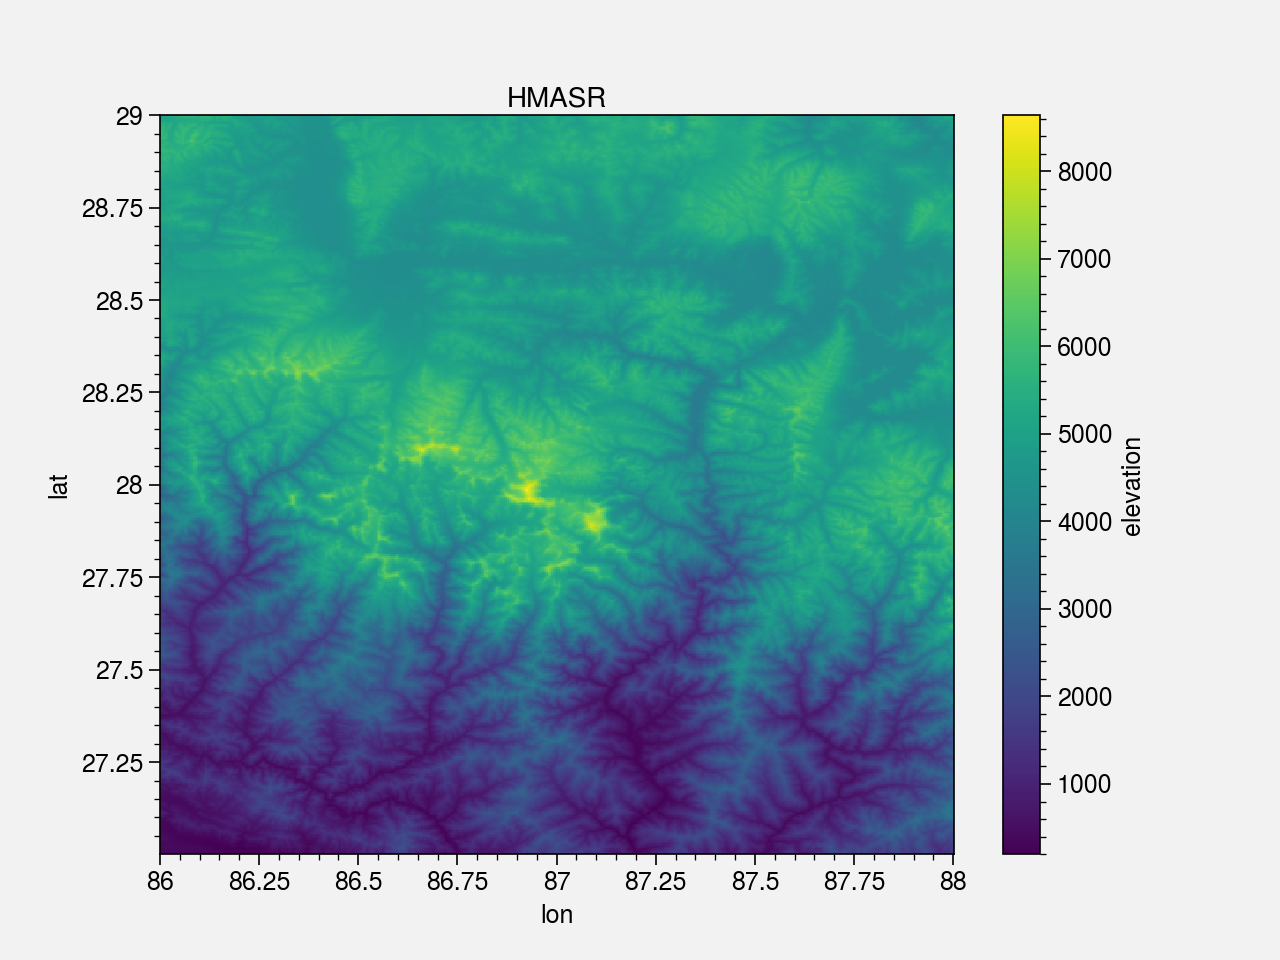

In [17]:
hmasr.sel(lat=slice(27, 29), lon=slice(86, 88)).plot()
plt.title('HMASR')
plt.savefig('HMASR_DEM_everest.jpg')

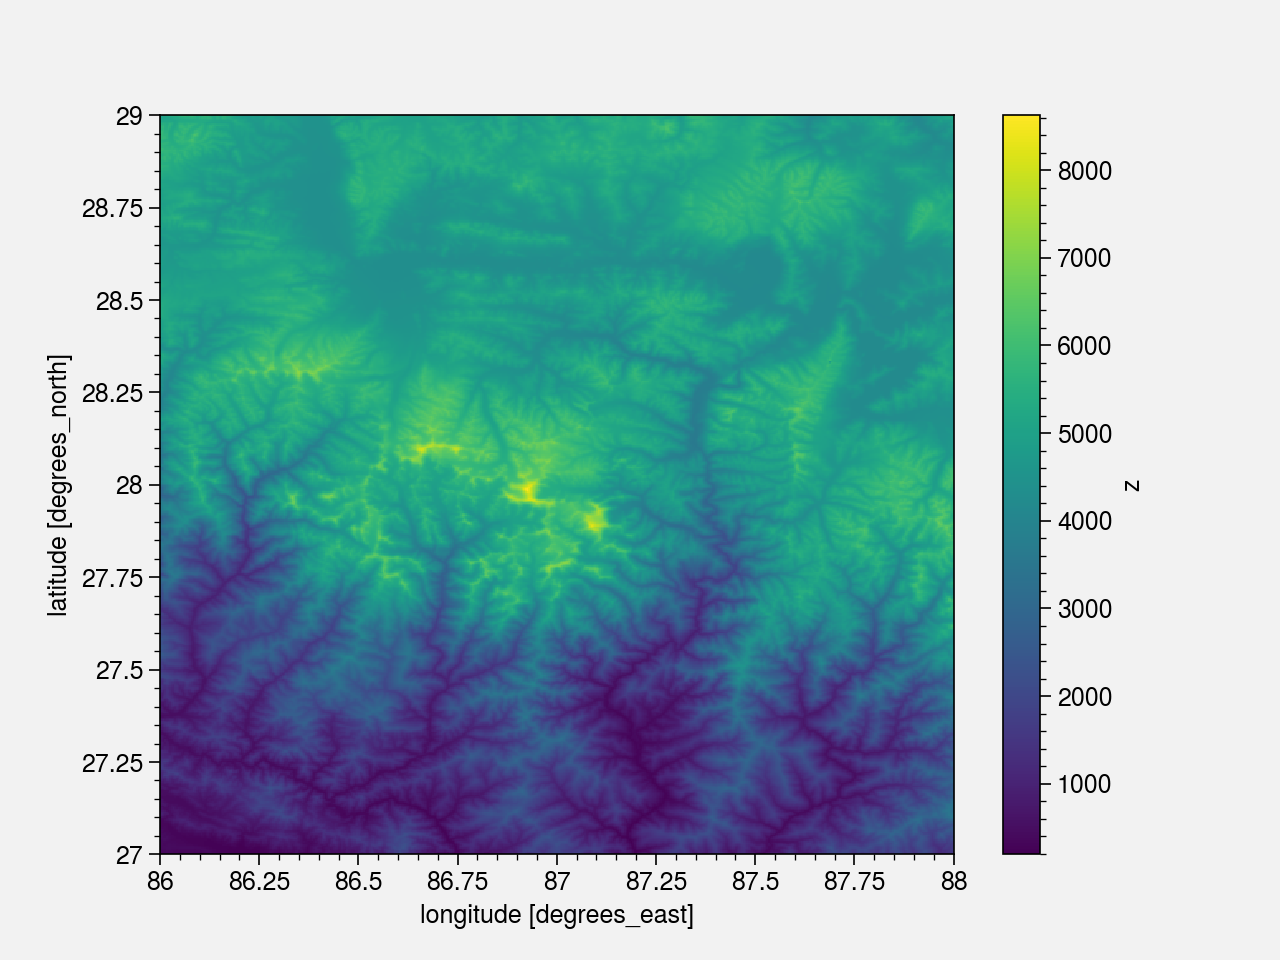

In [38]:
srtm.sel(lat=slice(27, 29), lon=slice(86, 88)).plot()
# plt.title('HMASR')
# plt.savefig('HMASR_DEM_everest.jpg')

## Aggregate to 1° and compare to GMTED2010

In [26]:
hmasr_1deg = hmasr.coarsen(lat=225, lon=225).mean()
hmasr_1deg['lat'] = np.round(hmasr_1deg.lat, 1) ; hmasr_1deg['lon'] = np.round(hmasr_1deg.lon, 1)

In [41]:
(hmasr_1deg - gmted).max()

<xarray.DataArray ()>
array(79.926025, dtype=float32)

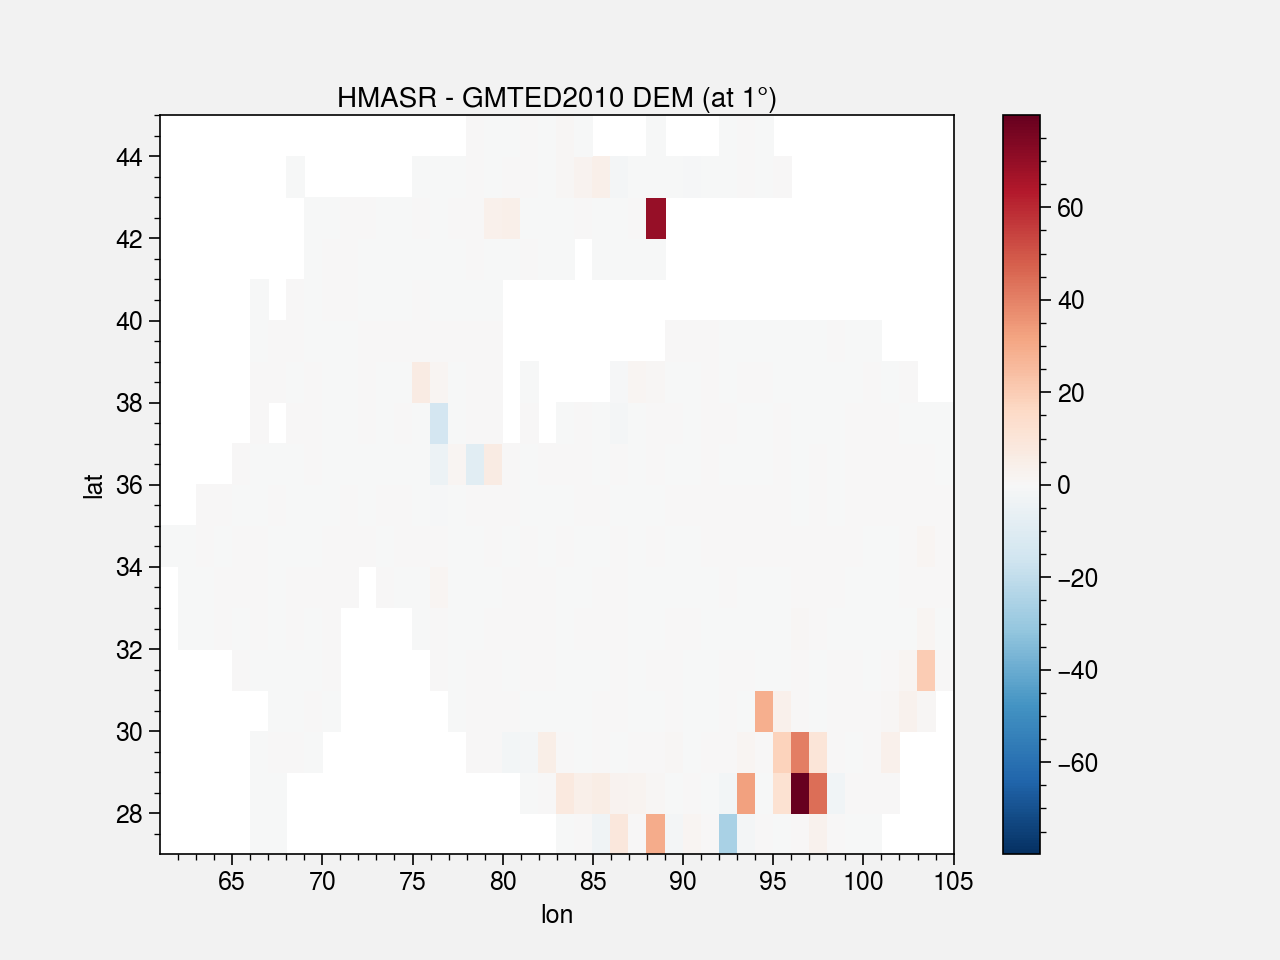

In [42]:
(hmasr_1deg - gmted).plot()
plt.title('HMASR - GMTED2010 DEM (at 1°)')
plt.savefig('HMASR-GMTED2010_DEM_1deg.jpg')